# NLP with Python on SMSSpamCollection Dataset
    **********************************************
    Author:        Adeyemi Adedoyin Simeon
    Date:          Feb. 28, 2019
    Location:      Ibadan, UI
    Version:       1.1
    Last Modified: Sept. 16, 2019
    E-mail:        adeyemi.sa1@gmail.com
    **********************************************

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import nltk as nlp

In [5]:
import string

In [6]:
from nltk.corpus import stopwords

In [7]:
msgs = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [8]:
for msg_no, sub_msg in enumerate(msgs[:10]):
    print(msg_no+1,'. :- ',sub_msg)

1 . :-  ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
2 . :-  ham	Ok lar... Joking wif u oni...
3 . :-  spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
4 . :-  ham	U dun say so early hor... U c already then say...
5 . :-  ham	Nah I don't think he goes to usf, he lives around here though
6 . :-  spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
7 . :-  ham	Even my brother is not like to speak with me. They treat me like aids patent.
8 . :-  ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
9 . :-  spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward

In [9]:
msgs = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['category','message'])

In [10]:
msg_df = pd.DataFrame(msgs)

In [11]:
msg_df.head(5)

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
msg_df.describe()

,category,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
msg_df.groupby('category').describe()

message                                                            \
           count unique                                                top   
category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
category       
ham        30  
spam        4

In [16]:
msg_df['msg_length'] = msg_df['message'].apply(len)

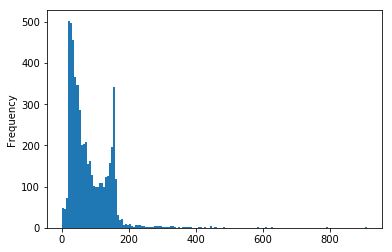

In [17]:
msg_df['msg_length'].plot.hist(bins=150)

In [18]:
msg_df['msg_length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: msg_length, dtype: float64

In [19]:
msg_df[msg_df['msg_length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002241B4F0588>,
      dtype=object)

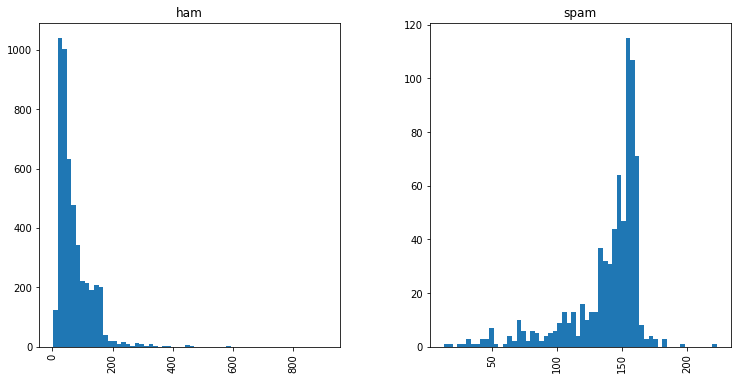

In [20]:
msg_df.hist(column='msg_length',bins=60,by='category',figsize=(12,6))

## Sample breakdown of text into token without punctuations

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
smt = "It's good to have you around! What more can't i tell you."

In [23]:
modifiedstr = [c for c in smt if c not in string.punctuation]

In [24]:
ans = ''.join(modifiedstr)

In [25]:
ans

'Its good to have you around What more cant i tell you'

## Implementation using a function

In [33]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [34]:
def text_process(mess):
    """
    1. Remove punctuations
    2. *Remove english stopwords* stored in stopwords.words('english')
    3. Return list of cleaned words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.split()
    #----------------------------------------------------------------------------
    #NOTE: add the line below if you have downloaded stopword by calling nltk.download_shell() and updated 'stopwords' package
    #in order to remove the commonly repeated english words such as articles, conjuctions, prepositions, etc.
    
    #return [word for word in nopunc if word.lower() not in stopwords.words('english')] 
    nopunc = [word for word in nopunc if word.lower() not in ENGLISH_STOP_WORDS] 
    #----------------------------------------------------------------------------
    
    #deviced_eng_common_words = ['a','an','the','to','at','on','in','of','with','so','under','above','about','yes','no','what','where',
    #              'who','how','within','over','since','too','me','you','our',]
    #nopunc = [word for word in nopunc if word.lower() not in deviced_eng_common_words]
    
    #Otherwise, return nopunc
    return nopunc

In [35]:
msg_df['msg_tokens'] = msg_df['message'].apply(text_process)

In [36]:
msg_df.head(5)

,category,message,msg_length,msg_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[jurong, point, crazy, Available, bugis, n, gr..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives]"


In [37]:
msg_df.drop(labels='msg_tokens',axis=1,inplace=True)

In [38]:
msg_df.head(5)

,category,message,msg_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Begin extraction of Bag Of Words from messages using CountVectorizer

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
bag_of_words_transformer = CountVectorizer(analyzer=text_process).fit(msg_df['message'])

In [65]:
print(len(bag_of_words_transformer.vocabulary_))

11173


In [66]:
mess4 = msg_df['message'][4]

In [67]:
bow4 = bag_of_words_transformer.transform([mess4])

In [68]:
print(bow4)

  (0, 2879)	1
  (0, 5972)	1
  (0, 6696)	1
  (0, 7652)	1
  (0, 10203)	1
  (0, 10556)	1


In [69]:
mess4

"Nah I don't think he goes to usf, he lives around here though"

In [70]:
print(bow4.shape)

(1, 11173)


In [71]:
bag_of_words_transformer.get_feature_names()[6696]

'goes'

In [72]:
bag_of_words_transformer.get_feature_names()[2879]

'Nah'

In [89]:
messages_bag_of_words = bag_of_words_transformer.transform(msg_df['message'])

In [90]:
print('shape of the Sparse Matrix created: ',messages_bag_of_words.shape)

shape of the Sparse Matrix created:  (5572, 11173)


In [96]:
print('Number of None Zero Occurences: ', messages_bag_of_words.nnz)

Number of None Zero Occurences:  46333


## Sparcity: number of non-zero messages / total messages 
### No of non-zero messages / row * col of total msgs
#### Gives idea of how many number of zeroes are in the sparse matrix

In [99]:
sparcity = (100.0 * messages_bag_of_words.nnz /(messages_bag_of_words.shape[0] * messages_bag_of_words.shape[1]))
print('Sparcity: {}'.format(sparcity))

Sparcity: 0.0744234013529565
